# TensorFlow A Neural Network part One

## Our steps are:

1. Build a Graph
2. Initiate the Session
3. Feed Data in and get Output

## We'll use the basic we've learned so far to accomplish this task!

In [95]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.compat.v1.disable_eager_execution() # important for version 1
%matplotlib inline

In [96]:
np.random.seed(101)
tf.compat.v1.set_random_seed(101)

In [97]:
rand_a = np.random.uniform(0,100,(5,5))
rand_a


array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [98]:
rand_b = np.random.uniform(0,100,(5,1))
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [99]:
a = tf.compat.v1.placeholder(tf.float32)

In [100]:
b = tf.compat.v1.placeholder(tf.float32)

In [101]:
add_op = a + b

In [102]:
mul_op = a * b

In [103]:
with tf.compat.v1.Session() as sess:

    add_result = sess.run(add_op,feed_dict={a:rand_a,b:rand_b})
    print(add_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


# TensorFlow A Neural Network part Two "Example of a Neural Network"



# Matrix multiplycation

Remember that

In [104]:
n_features = 10
n_dense_neuorons = 3

# Example of a Tensorflow Graph

![TensorFlow Graph](TensorFlowGraph.png)

In [105]:
x = tf.compat.v1.placeholder(tf.float32,(None,n_features))

In [106]:
Weights = tf.Variable(tf.compat.v1.random_normal([n_features,n_dense_neuorons]))

bias = tf.Variable(tf.ones([n_dense_neuorons]))

In [107]:
xW = tf.matmul(x,Weights)

In [108]:
z = tf.add(xW,bias)

In [109]:
a = tf.sigmoid(z)

In [110]:
init = tf.compat.v1.global_variables_initializer()

In [111]:
with tf.compat.v1.Session() as sess:

    sess.run(init)

    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})

In [112]:
print(layer_out)

[[0.70294994 0.8543769  0.32494378]]


## Simple Regression Example

In [113]:
# linear line with some noise added

x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [114]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [115]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

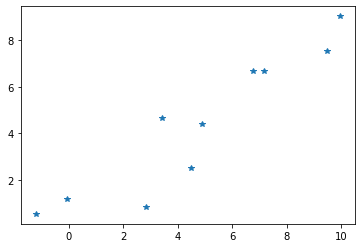

In [116]:
plt.plot(x_data,y_label,'*')

In [117]:
# The Neural network has to solve the equation y = mx + b

# m and b has been chosen randomly it is up to the Neural network with it's cost function to adjust

np.random.rand(2)

m = tf.Variable(0.33)
b = tf.Variable(0.65)

In [118]:
# cost/error function

error = 0

for x,y in zip(x_data,y_label):

    y_hat = m*x + b

    error += (y - y_hat)**2 # error is different compared to real output. squared is to really punish the error

In [119]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [120]:
init = tf.compat.v1.global_variables_initializer()

In [125]:
with tf.compat.v1.Session() as sess:

    sess.run(init)

    training_steps = 100

    for i in range(training_steps):

        sess.run(train)

    final_slope, final_intercept = sess.run([m,b])


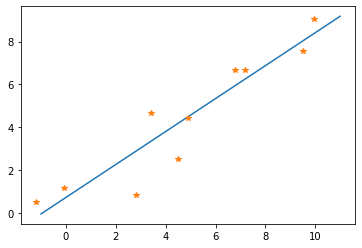

In [126]:
x_test = np.linspace(-1,11,10)

# y = mx + b
y_pred_plot = final_slope * x_test + final_intercept

plt.plot(x_test,y_pred_plot)
plt.plot(x_data,y_label,'*')